# Algoritmo de KNN utilizando ScikitLearn para la clasificación de clientes de una institución financiera.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier


Obtener nuestro DataSet y guardarlo en una variable

In [3]:
credito_path = ('https://raw.githubusercontent.com/SpartanKlein/Inteligencia-Artificial-EJ23-1718/main/data/creditos.csv')
creditos = pd.read_csv(credito_path)

Visualizamos rapidamente nuestros datos

In [5]:
creditos.head()

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


Dividimos los clientes entre los que si cumplearon y los que no cumplieron

In [4]:
c_buenos = creditos[creditos['cumplio'] == 1]
c_malos = creditos[creditos['cumplio'] == 0]


Gráficamos los datos de nuestros deudores 

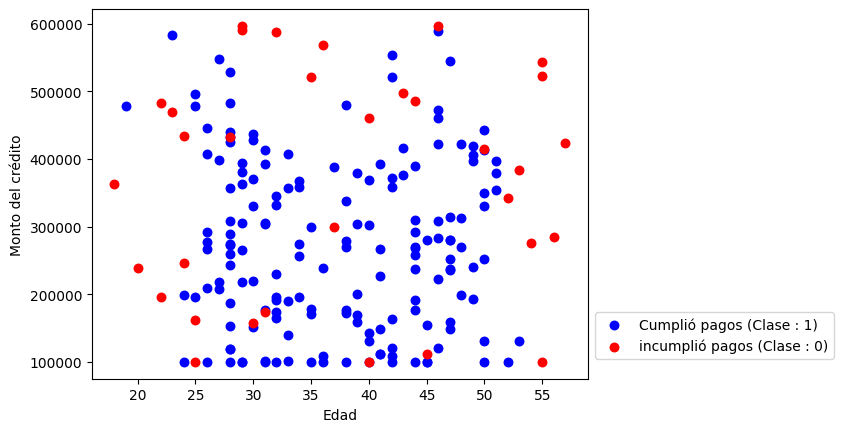

In [7]:
plt.scatter(c_buenos['edad'], c_buenos['credito'], marker='.', s =150, color = 'blue', label = 'Cumplió pagos (Clase : 1)')

plt.scatter(c_malos['edad'], c_malos['credito'], marker='.', s =150, color = 'red', label = 'incumplió pagos (Clase : 0)')

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

Preparación escalar de los datos


In [8]:
datos = creditos[['edad', 'credito']]
clase = creditos['cumplio']

escalator = preprocessing.MinMaxScaler()

datos = escalator.fit_transform(datos)

# Creación del modelo KNN

In [9]:
classificator = KNeighborsClassifier(n_neighbors=3)

classificator.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

# Nuevo solicitante de crédito

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase: [0]
Probabilidades por clase [[0.66666667 0.33333333]]


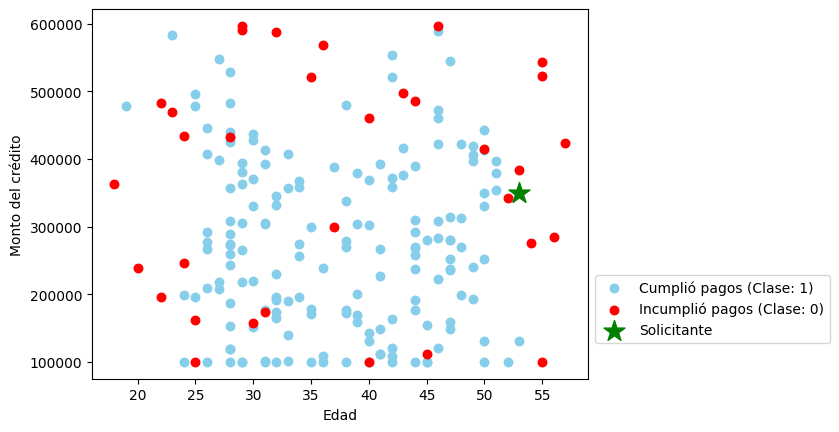

In [11]:
#Datos del nuevo solicitante
edad = 53
monto = 350000

# Escalar sus datos
solicitante = escalator.transform([[edad, monto]])

# Calcular su clase y probabilidades
print('Clase:', classificator.predict(solicitante))
print('Probabilidades por clase', classificator.predict_proba(solicitante))

# Gráficamos sus resultados
plt.scatter(c_buenos['edad'], c_buenos['credito'], marker='.', s=150, color='skyblue', label='Cumplió pagos (Clase: 1)')
plt.scatter(c_malos['edad'], c_malos['credito'], marker=".", s=150, color='red', label='Incumplió pagos (Clase: 0)')

plt.scatter(edad, monto, marker = '*', s = 250, color = 'green', label = 'Solicitante')
plt.ylabel('Monto del crédito')
plt.xlabel("Edad")
plt.legend(bbox_to_anchor = (1, 0.3))
plt.show()

# Regiones de las clases

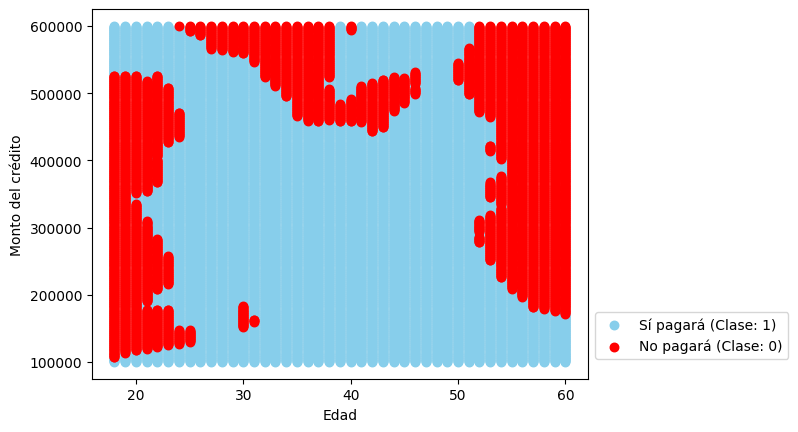

In [17]:
#Datos sinténticos de todos los posibles solicitantes
clientes = np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades = np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos = pd.DataFrame(np.stack((edades, clientes), axis=2)[0],
                     columns=["edad", "credito"])

#Escalar los datos
solicitantes = escalator.transform(todos)

#Predecir todas las clases
clases_resultantes = classificator.predict(solicitantes)

#Código para graficar
c_buenos = todos[clases_resultantes==1]
c_malos = todos[clases_resultantes==0]
plt.scatter(c_buenos['edad'], c_buenos['credito'],
            marker='.', s=150, color='skyblue', label='Sí pagará (Clase: 1)')
plt.scatter(c_malos['edad'], c_malos['credito'],
            marker='.', s=150, color='red', label='No pagará (Clase: 0)')
plt.ylabel('Monto del crédito')
plt.xlabel('Edad')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()